In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("./datos_entrenamiento.csv")

In [3]:
contaminantes = ['O3', 'PM10', 'PM2.5','TMP', 'WDR','dia', 'fecha', 'hora', 'mes','PM10mean', 'PM25mean']
df = df[contaminantes]

In [4]:
df_gb = df.groupby(['fecha']).mean()
df_gb.reset_index(inplace=True)

## fechas 

In [5]:
df_gb['fecha'] = pd.to_datetime(df_gb['fecha'], format='%Y-%m-%d')
df_gb['dias_semana'] = df_gb['fecha'].dt.day_name()

In [6]:
df_gb['dias_semana'].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [7]:
days = ["Monday", 'Tuesday',"Wednesday", 'Thursday','Friday','Saturday', 'Sunday']
dias = ["Lunes","Martes","Miércoles","Jueves","Viernes","Sábado","Domingo"]

In [8]:
for row in range(len(df_gb)):
    for dia_nombre in range(len(days)):       
        if df_gb.loc[row,"dias_semana"] == days[dia_nombre]: 
            df_gb.loc[row,"dias_semana"] = dias[dia_nombre]

In [9]:
df_gb.head()

,fecha,O3,PM10,PM2.5,TMP,WDR,dia,hora,mes,PM10mean,PM25mean,dias_semana
0,2016-01-02 00:00:00,9.956522,41.916667,21.250000,15.494118,197.941176,2,0,1,NaN,NaN,Sábado
1,2016-01-02 01:00:00,11.391304,42.583333,30.333333,12.035294,197.647059,2,1,1,NaN,NaN,Sábado
2,2016-01-02 02:00:00,10.826087,39.416667,30.916667,11.905882,167.000000,2,2,1,NaN,NaN,Sábado
3,2016-01-02 03:00:00,10.782609,35.250000,26.916667,11.605882,172.176471,2,3,1,NaN,NaN,Sábado
4,2016-01-02 04:00:00,9.260870,33.818182,22.583333,11.341176,126.529412,2,4,1,NaN,NaN,Sábado


<Figure size 432x288 with 0 Axes>

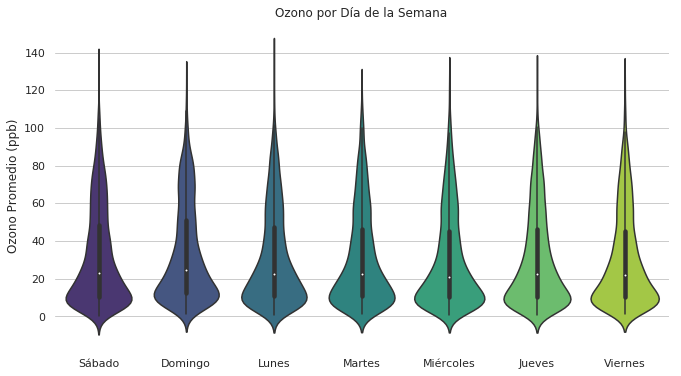

In [10]:
sns.despine(left=True, bottom=True)
f, ax = plt.subplots(figsize=(11, 6))

ax.set_title('Ozono por Día de la Semana')



sns.set_style(style='white')
sns.set(font_scale=1.5)
#sns.set_style("whitegrid")
sns.set_style(style='white')


sns.violinplot(x=df_gb["dias_semana"], y=df_gb["O3"], palette="viridis");

ax.set_ylabel('Ozono Promedio (ppb)')    
ax.set_xlabel('')

sns.despine(left=True, bottom=True)
f.savefig("O3_dia.png",dpi=300)

In [11]:
df_gb.head()

,fecha,O3,PM10,PM2.5,TMP,WDR,dia,hora,mes,PM10mean,PM25mean,dias_semana
0,2016-01-02 00:00:00,9.956522,41.916667,21.250000,15.494118,197.941176,2,0,1,NaN,NaN,Sábado
1,2016-01-02 01:00:00,11.391304,42.583333,30.333333,12.035294,197.647059,2,1,1,NaN,NaN,Sábado
2,2016-01-02 02:00:00,10.826087,39.416667,30.916667,11.905882,167.000000,2,2,1,NaN,NaN,Sábado
3,2016-01-02 03:00:00,10.782609,35.250000,26.916667,11.605882,172.176471,2,3,1,NaN,NaN,Sábado
4,2016-01-02 04:00:00,9.260870,33.818182,22.583333,11.341176,126.529412,2,4,1,NaN,NaN,Sábado


In [12]:
colors_0 = ["teal","dimgray","tan","sienna", "steelblue","cadetblue","saddlebrown"]

In [20]:
colors_pagina = ["dimgray","gainsboro","slategray","lightgray"]

<Figure size 432x288 with 0 Axes>

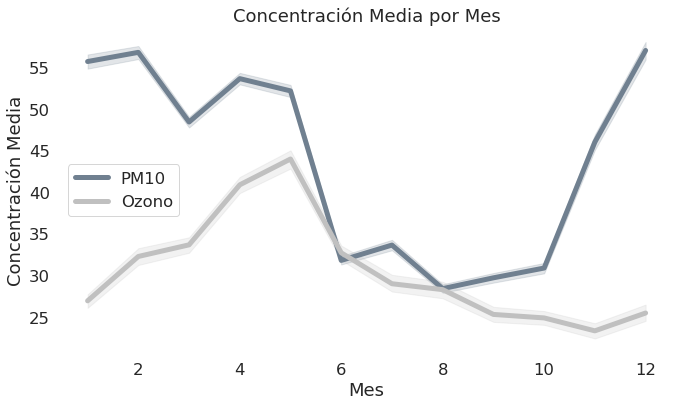

In [66]:
sns.despine(left=False, bottom=False)
f, ax = plt.subplots(figsize=(11, 6))
sns.set(font_scale=1.5)
sns.set_style(style='white')
#sns.set_style("white")


# Plot the responses for different events and regions

sns.lineplot(x="mes", y="PM10",label="PM10",color=colors_pagina[2],
             data=df_gb,linewidth=5)


sns.lineplot(x="mes", y="O3",label="Ozono",color="silver",
             data=df_gb,linewidth=5)
sns.despine(left=True, bottom=True, right=True)


ax.set_title('Concentración Media por Mes')
ax.legend()
ax.set(xlabel='Mes', ylabel='Concentración')
f.savefig("contaminantes_mes.png",dpi=300)

In [33]:
df_mes = df.groupby(['mes']).mean()
df_mes.reset_index(inplace=True)

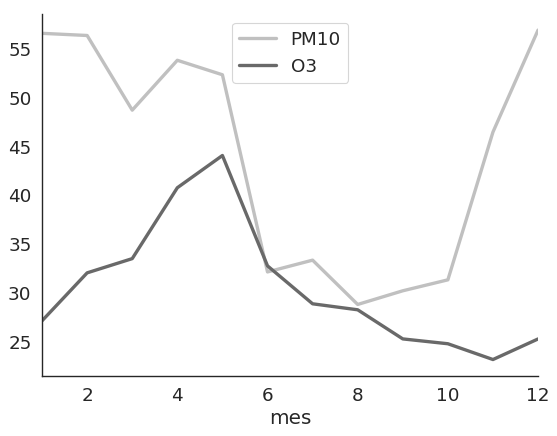

In [60]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='w')
ax = fig.gca()


df_mes.plot(x="mes", y="PM10",label="PM10",color="silver",ax=ax,linewidth=3)
df_mes.plot(x="mes", y="O3",label="O3",color=colors_pagina[0],ax=ax,linewidth=3)


#ax.annotate('PM10', xy=(2, 1), xytext=(3, 1.5),arrowprops=dict(facecolor='black', shrink=0.05),            )

#ax.axis('off')
#plt.legend()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

<Figure size 432x288 with 0 Axes>

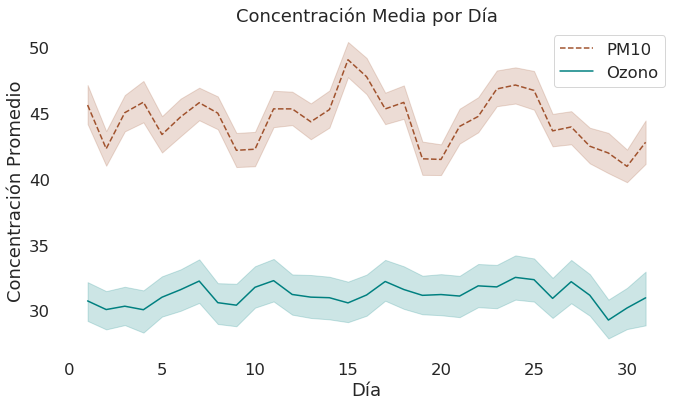

In [67]:
sns.despine(left=False, bottom=False)
f, ax = plt.subplots(figsize=(11, 6))
sns.set(font_scale=1.5)
sns.set_style(style='white')
#sns.set_style("white")


# Plot the responses for different events and regions

sns.lineplot(x="dia", y="PM10",label="PM10",color=colors_0[3],
             data=df_gb)

[line.set_linestyle("--") for line in ax.lines] 

sns.lineplot(x="dia", y="O3",label="Ozono",color=colors_0[0],
             data=df_gb)
sns.despine(left=True, bottom=True, right=True)


ax.set_title('Concentración Media por Día')
ax.legend()
ax.set(xlabel='Día', ylabel='Concentración Promedio')
f.savefig("contaminantes_DIA.png",dpi=300)

In [218]:
colors = ["teal","darkslategray","cadetblue", "steelblue","slategray","lightseagreen","powderblue","skyblue"]
color_2= ["indianred","lightcoral","sienna","chocolate","peru","darkgoldenrod","tan"]

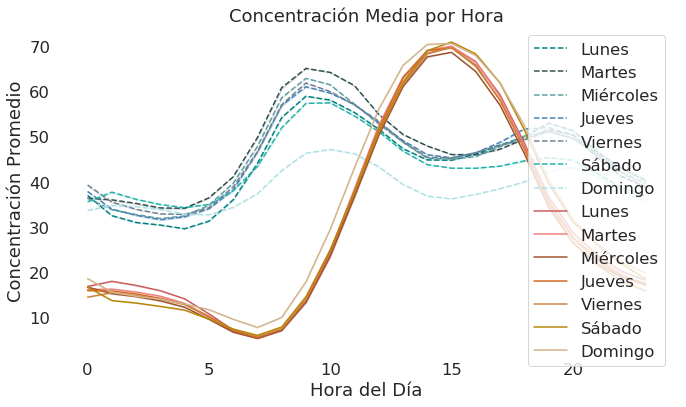

In [230]:

f, ax = plt.subplots(figsize=(11, 6))
sns.set(font_scale=1.5)
sns.set_style(style='white')

ax.set_title('Concentración Media por Hora')


# Plot the responses for different events and regions
sns.lineplot(x="hora", y="PM10",label="Lunes",ci=0,color=colors[0],
             data=df_gb[df_gb["dias_semana"]=="Lunes"])
sns.lineplot(x="hora", y="PM10",label="Martes",ci=0,color=colors[1],
             data=df_gb[df_gb["dias_semana"]=="Martes"])
sns.lineplot(x="hora", y="PM10",label="Miércoles",ci=0,color=colors[2],
             data=df_gb[df_gb["dias_semana"]=="Miércoles"])
sns.lineplot(x="hora", y="PM10",label="Jueves",ci=0,color=colors[3],
             data=df_gb[df_gb["dias_semana"]=="Jueves"])
sns.lineplot(x="hora", y="PM10",label="Viernes",ci=0,color=colors[4],
             data=df_gb[df_gb["dias_semana"]=="Viernes"])
sns.lineplot(x="hora", y="PM10",label="Sábado",ci=0,dashes=[1,2],color=colors[5],
             data=df_gb[df_gb["dias_semana"]=="Sábado"])
sns.lineplot(x="hora", y="PM10",label="Domingo",ci=0,color=colors[6],
             data=df_gb[df_gb["dias_semana"]=="Domingo"])

[line.set_linestyle("--") for line in ax.lines] 

sns.despine(left=True, bottom=True, right=True)

# Plot the responses for different events and regions
sns.lineplot(x="hora", y="O3",label="Lunes",ci=0,color=color_2[0],
             data=df_gb[df_gb["dias_semana"]=="Lunes"])
sns.lineplot(x="hora", y="O3",label="Martes",ci=0,color=color_2[1],
             data=df_gb[df_gb["dias_semana"]=="Martes"])
sns.lineplot(x="hora", y="O3",label="Miércoles",ci=0,color=color_2[2],
             data=df_gb[df_gb["dias_semana"]=="Miércoles"])
sns.lineplot(x="hora", y="O3",label="Jueves",ci=0,color=color_2[3],
             data=df_gb[df_gb["dias_semana"]=="Jueves"])
sns.lineplot(x="hora", y="O3",label="Viernes",ci=0,color=color_2[4],
             data=df_gb[df_gb["dias_semana"]=="Viernes"])
sns.lineplot(x="hora", y="O3",label="Sábado",ci=0,color=color_2[5],
             data=df_gb[df_gb["dias_semana"]=="Sábado"])
sns.lineplot(x="hora", y="O3",label="Domingo",ci=0,color=color_2[6],
             data=df_gb[df_gb["dias_semana"]=="Domingo"])


#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel='Hora del Día', ylabel='Concentración Promedio')
f.savefig("contaminantes_hora.png",dpi=300,transparent=False)